In [1]:
import os
import glob
import gzip
from collections import defaultdict, Counter
import multiprocessing as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import *
import pysam
import pyBigWig
from pyBioInfo.Range import GRange
from pyBioInfo.IO.File import BedFile
from pyBioInfo.Utils import ShiftLoader

# Benchmark of full SVs

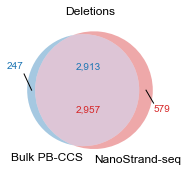

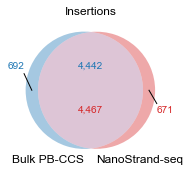

In [32]:
data = json.load(open("../../3_NanoStrandSeq_PseudoBulk/results/sv/benchmark/PacBio.full_vs_NSS.full.json"))
d1, d2 = data["Del_Detail"]
n1, n2 = d1["Reference"], d1["Reference_Hit"]
n3, n4 = d2["Reference"], d2["Reference_Hit"]
plt.figure(figsize=(2.8, 2.5))
plt.title("Deletions")
vs = [n1 - n2, n3 - n4, int((n2 + n4)/2)]
ret = venn2(vs, set_labels=["Bulk PB-CCS", "NanoStrand-seq"], set_colors=["C0", "C3"])
if False:
    ret.subset_labels[0].set_text(format(vs[0], ","))
    ret.subset_labels[1].set_text(format(vs[1], ","))
    ret.subset_labels[2].set_text("%s   \n\n   %s" % (format(n2, ","), format(n4, ",")))
    plt.plot([0.25, 0.4], [-0.05, 0], color="black", lw=1)
    plt.plot([-0.35, -0.2], [0, 0.05], color="black", lw=1)
else:
    ret.subset_labels[0].set_text(None)
    ret.subset_labels[1].set_text(None)
    ret.subset_labels[2].set_text(None)
    plt.text(-0.6, 0.2, "%s" % format(n1 - n2, ","), ha="right", color="C0")
    plt.text(0, 0.2, "%s" % format(n2, ","), ha="center", color="C0")
    plt.text(0.6, -0.2, "%s" % format(n3 - n4, ","), ha="left", color="C3")
    plt.text(0, -0.2, "%s" % format(n4, ","), ha="center", color="C3")
    plt.plot([-0.6, -0.53], [0.15, 0], color="black", lw=1)
    plt.plot([0.6, 0.53], [-0.12, 0], color="black", lw=1)
plt.tight_layout()
plt.savefig("figures/benchmark_sv.pb_vs_nss.del.pdf", dpi=300)

d1, d2 = data["Ins_Detail"]
n1, n2 = d1["Reference"], d1["Reference_Hit"]
n3, n4 = d2["Reference"], d2["Reference_Hit"]
plt.figure(figsize=(2.8, 2.5))
plt.title("Insertions")
vs = [n1 - n2, n3 - n4, int((n2 + n4)/2)]
ret = venn2(vs, set_labels=["Bulk PB-CCS", "NanoStrand-seq"], set_colors=["C0", "C3"])
if False:
    ret.subset_labels[0].set_text(format(vs[0], ","))
    ret.subset_labels[1].set_text(format(vs[1], ","))
    ret.subset_labels[2].set_text("%s   \n\n   %s" % (format(n2, ","), format(n4, ",")))
    plt.plot([0.25, 0.4], [-0.05, 0], color="black", lw=1)
    plt.plot([-0.35, -0.2], [0, 0.05], color="black", lw=1)
else:
    ret.subset_labels[0].set_text(None)
    ret.subset_labels[1].set_text(None)
    ret.subset_labels[2].set_text(None)
    plt.text(-0.6, 0.2, "%s" % format(n1 - n2, ","), ha="right", color="C0")
    plt.text(0, 0.2, "%s" % format(n2, ","), ha="center", color="C0")
    plt.text(0.6, -0.2, "%s" % format(n3 - n4, ","), ha="left", color="C3")
    plt.text(0, -0.2, "%s" % format(n4, ","), ha="center", color="C3")
    plt.plot([-0.6, -0.53], [0.15, 0], color="black", lw=1) 
    plt.plot([0.6, 0.53], [-0.12, 0], color="black", lw=1)
plt.tight_layout()
plt.savefig("figures/benchmark_sv.pb_vs_nss.ins.pdf", dpi=300)

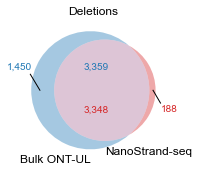

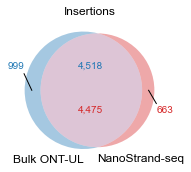

In [34]:
data = json.load(open("../../3_NanoStrandSeq_PseudoBulk/results/sv/benchmark/Ultralong.full_vs_NSS.full.json"))
d1, d2 = data["Del_Detail"]
n1, n2 = d1["Reference"], d1["Reference_Hit"]
n3, n4 = d2["Reference"], d2["Reference_Hit"]
plt.figure(figsize=(2.8, 2.5))
plt.title("Deletions")
vs = [n1 - n2, n3 - n4, int((n2 + n4)/2)]
ret = venn2(vs, set_labels=["Bulk ONT-UL", "NanoStrand-seq"], set_colors=["C0", "C3"])
if False:
    ret.subset_labels[0].set_text(format(vs[0], ","))
    ret.subset_labels[1].set_text(format(vs[1], ","))
    ret.subset_labels[2].set_text("%s   \n\n   %s" % (format(n2, ","), format(n4, ",")))
    plt.plot([0.25, 0.4], [-0.05, 0], color="black", lw=1)
    plt.plot([-0.35, -0.2], [0, 0.05], color="black", lw=1)
else:
    ret.subset_labels[0].set_text(None)
    ret.subset_labels[1].set_text(None)
    ret.subset_labels[2].set_text(None)
    plt.text(-0.6, 0.2, "%s" % format(n1 - n2, ","), ha="right", color="C0")
    plt.text(0, 0.2, "%s" % format(n2, ","), ha="center", color="C0")
    plt.text(0.6, -0.2, "%s" % format(n3 - n4, ","), ha="left", color="C3")
    plt.text(0, -0.2, "%s" % format(n4, ","), ha="center", color="C3")
    plt.plot([-0.62, -0.53], [0.15, 0], color="black", lw=1)
    plt.plot([0.6, 0.53], [-0.12, 0], color="black", lw=1)
plt.tight_layout()
plt.savefig("figures/benchmark_sv.ont_vs_nss.del.pdf", dpi=300)

d1, d2 = data["Ins_Detail"]
n1, n2 = d1["Reference"], d1["Reference_Hit"]
n3, n4 = d2["Reference"], d2["Reference_Hit"]
plt.figure(figsize=(2.8, 2.5))
plt.title("Insertions")
vs = [n1 - n2, n3 - n4, int((n2 + n4)/2)]
ret = venn2(vs, set_labels=["Bulk ONT-UL", "NanoStrand-seq"], set_colors=["C0", "C3"])
if False:
    ret.subset_labels[0].set_text(format(vs[0], ","))
    ret.subset_labels[1].set_text(format(vs[1], ","))
    ret.subset_labels[2].set_text("%s   \n\n   %s" % (format(n2, ","), format(n4, ",")))
    plt.plot([0.25, 0.4], [-0.05, 0], color="black", lw=1)
    plt.plot([-0.35, -0.2], [0, 0.05], color="black", lw=1)
else:
    ret.subset_labels[0].set_text(None)
    ret.subset_labels[1].set_text(None)
    ret.subset_labels[2].set_text(None)
    plt.text(-0.6, 0.2, "%s" % format(n1 - n2, ","), ha="right", color="C0")
    plt.text(0, 0.2, "%s" % format(n2, ","), ha="center", color="C0")
    plt.text(0.6, -0.2, "%s" % format(n3 - n4, ","), ha="left", color="C3")
    plt.text(0, -0.2, "%s" % format(n4, ","), ha="center", color="C3")
    plt.plot([-0.6, -0.53], [0.15, 0], color="black", lw=1)
    plt.plot([0.6, 0.53], [-0.12, 0], color="black", lw=1)
plt.tight_layout()
plt.savefig("figures/benchmark_sv.ont_vs_nss.ins.pdf", dpi=300)

# Benchmark of downsample SVs

In [3]:
covs = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
rs = [1, 2]
refs = ["PacBio.full", "Ultralong.full"]
ques = ["PacBio", "Ultralong", "NSS"]
rows = []
for ref in refs:
    for que in ques:
        for cov in covs:
            for r in rs:
                path = "../../6_nss-pseudobulk-analysis/results/sv/benchmark/%s_vs_%s.cov%s-r%s.json" % (ref, que, cov, r)
                if os.path.exists(path):
                    d = json.load(open(path))
                    del_recall = d["Del_Recall"]
                    del_precision = d["Del_Precision"]
                    del_f1 = d["Del_F1"]
                    ins_recall = d["Ins_Recall"]
                    ins_precision = d["Ins_Precision"]
                    ins_f1 = d["Ins_F1"]
                    row = [ref, que, cov, r, del_recall, del_precision, del_f1, ins_recall, ins_precision, ins_f1]
                    rows.append(row)
dat = pd.DataFrame(rows, columns=["Reference", "Query", "Depth", "Repeat", "DelRecall", "DelPrecision", "DelF1", "InsRecall", "InsPrecision", "InsF1"])
dat.head()

,Reference,Query,Depth,Repeat,DelRecall,DelPrecision,DelF1,InsRecall,InsPrecision,InsF1
0,PacBio.full,PacBio,5,1,0.292722,1.000000,0.452876,0.253214,0.998464,0.403978
1,PacBio.full,PacBio,5,2,0.290823,1.000000,0.450601,0.261200,0.999255,0.414145
2,PacBio.full,PacBio,10,1,0.710443,1.000000,0.830712,0.664199,0.999121,0.797941
3,PacBio.full,PacBio,10,2,0.710759,0.999555,0.830775,0.671017,0.998551,0.802656
4,PacBio.full,PacBio,15,1,0.900316,0.999298,0.947228,0.867160,0.999327,0.928564


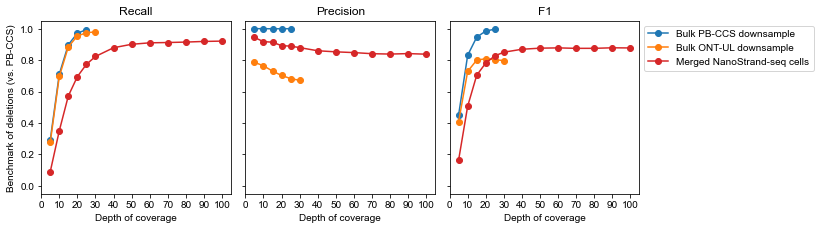

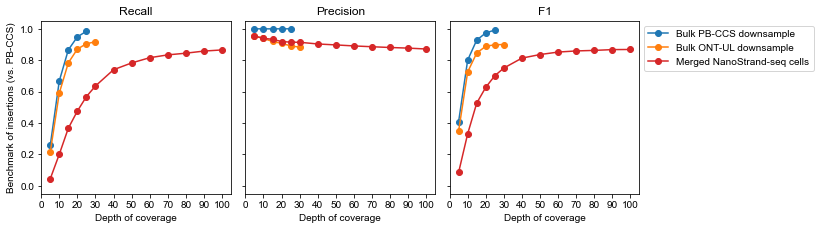

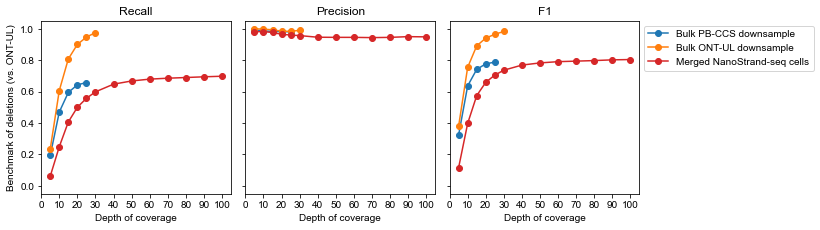

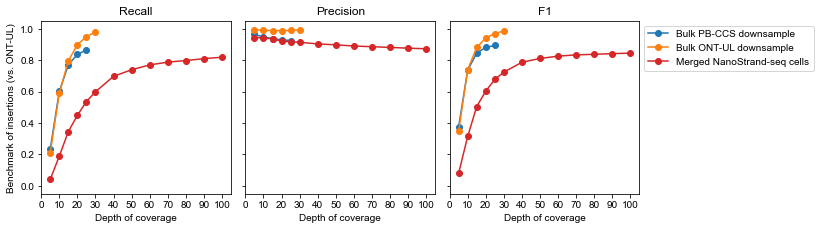

In [4]:
labels = {
    "PacBio": "Bulk PB-CCS downsample",
    "Ultralong": "Bulk ONT-UL downsample",
    "NSS": "Merged NanoStrand-seq cells"
}
colors = {
    "PacBio": "C0",
    "Ultralong": "C1",
    "NSS": "C3"
}

for ref in refs:
    for svtype in ["Del", "Ins"]:
        fig, axs = plt.subplots(1, 3, figsize=(11.5, 3.3), sharex=True, sharey=True)
        for i in range(3):
            ax = axs[i]
            plt.sca(ax)
            
            if i == 0:
                suffix = "Recall"
            elif i == 1:
                suffix = "Precision"
            else:
                suffix = "F1"
                
            plt.title(suffix)
            
            for que in ques:
                d = dat[(dat["Reference"] == ref) & (dat["Query"] == que)]
                m1 = d["Depth"].values.reshape((-1, 2))
                m2 = d["%s%s" % (svtype, suffix)].values.reshape((-1, 2))
                
                xs = m1[:,0]
                means = np.mean(m2, axis=1)
                stds = np.std(m2, axis=1)
                plt.plot(xs, means, label=labels[que], marker="o", color=colors[que])
                
            plt.xlabel("Depth of coverage")
            plt.xlim(0, 105)
            plt.xticks(np.arange(0, 110, 10))
            plt.ylim(-0.05, 1.05)
            if i == 0:
                plt.ylabel("Benchmark of %s (vs. %s)" % ("deletions" if svtype == "Del" else "insertions", 
                                                         "PB-CCS" if ref.startswith("PacBio") else "ONT-UL"))
            
            if i == 2:
                plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

        plt.tight_layout()
        plt.savefig("figures/benchmark_sv.downsample.vs_%s.%s.pdf" % (ref, svtype), dpi=300)
        # break
    # break